In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
df= pd.read_csv('properties_colombia_train.csv')

In [3]:
df

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,444298,u2M1W+AwbEZlRdmphDOuZg==,Propiedad,2020-10-27,9999-12-31,2020-10-27,4.649682,-74.161950,Colombia,Cundinamarca,...,NaN,NaN,1.290000e+08,COP,NaN,LM: VENDO APARTAMENTO EN TORRES DE TINTALA,"VENDO LINDO APARTAMENTO EN EL TINTAL, SEXTO PI...",Apartamento,Venta,POINT (-74.1619504 4.649682)
197545,976934,m0P17AlA6Sp+uvJTI3x3AA==,Propiedad,2020-11-27,2020-12-09,2020-11-27,4.668000,-74.055000,Colombia,Cundinamarca,...,NaN,17.0,1.350000e+08,COP,NaN,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,POINT (-74.055 4.668)
197546,508286,nSRnmPZIwE92m/FQv8ktVQ==,Propiedad,2020-10-28,2021-01-02,2020-10-28,3.413000,-76.541000,Colombia,Valle del Cauca,...,NaN,NaN,5.200000e+08,COP,NaN,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,POINT (-76.541 3.413)
197547,546633,cbYIZxxFHsXvvkixg5+DBQ==,Propiedad,2020-08-14,2020-08-14,2020-08-14,4.674874,-74.147077,Colombia,Cundinamarca,...,NaN,NaN,2.900000e+08,COP,Mensual,VENTA CASALOTE FONTIBON,CASALOTE BIEN UBICADO FONTIBON OPSION DE CONST...,Casa,Venta,POINT (-74.14707691 4.67487431)


In [4]:
df.isna().sum()

Unnamed: 0              0
id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                 49498
lon                 49498
l1                      0
l2                      0
l3                  11032
l4                 152182
l5                 170140
l6                 190682
rooms              170012
bedrooms           157024
bathrooms           41082
surface_total      190575
surface_covered    187747
price                  63
currency               67
price_period       161578
title                   1
description           121
property_type           0
operation_type          0
geometry                0
dtype: int64

In [5]:
promedio = df["price"].mean()
promedio

643605091.0064613

In [6]:
df["target"] = (df['price'] >= promedio).astype(int)

In [7]:
df

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry,target
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203),1
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485),0
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709),0
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY,1
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,444298,u2M1W+AwbEZlRdmphDOuZg==,Propiedad,2020-10-27,9999-12-31,2020-10-27,4.649682,-74.161950,Colombia,Cundinamarca,...,NaN,1.290000e+08,COP,NaN,LM: VENDO APARTAMENTO EN TORRES DE TINTALA,"VENDO LINDO APARTAMENTO EN EL TINTAL, SEXTO PI...",Apartamento,Venta,POINT (-74.1619504 4.649682),0
197545,976934,m0P17AlA6Sp+uvJTI3x3AA==,Propiedad,2020-11-27,2020-12-09,2020-11-27,4.668000,-74.055000,Colombia,Cundinamarca,...,17.0,1.350000e+08,COP,NaN,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,POINT (-74.055 4.668),0
197546,508286,nSRnmPZIwE92m/FQv8ktVQ==,Propiedad,2020-10-28,2021-01-02,2020-10-28,3.413000,-76.541000,Colombia,Valle del Cauca,...,NaN,5.200000e+08,COP,NaN,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,POINT (-76.541 3.413),0
197547,546633,cbYIZxxFHsXvvkixg5+DBQ==,Propiedad,2020-08-14,2020-08-14,2020-08-14,4.674874,-74.147077,Colombia,Cundinamarca,...,NaN,2.900000e+08,COP,Mensual,VENTA CASALOTE FONTIBON,CASALOTE BIEN UBICADO FONTIBON OPSION DE CONST...,Casa,Venta,POINT (-74.14707691 4.67487431),0


In [8]:
df.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of Unnamed: 0           int64
id                  object
ad_type             object
start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
l4                  object
l5                  object
l6                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
price_period        object
title               object
description         object
property_type       object
operation_type      object
geometry            object
target               int32
dtype: object>

In [9]:
#x=df.drop(columns=['price','id'])
#y = df.price
#x.shape


(197549, 26)

In [10]:
#x.dtypes.value_counts()

object     17
float64     7
int64       1
int32       1
dtype: int64

In [9]:
#separo las variables categoricas de las numericas 
df_var_cat= df.select_dtypes(include=['object'])
df_var_num= df.select_dtypes(include=['int64','float64'])

In [10]:
df_var_cat.head(3)

,id,ad_type,start_date,end_date,created_on,l1,l2,l3,l4,l5,l6,currency,price_period,title,description,property_type,operation_type,geometry
0,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,Colombia,Antioquia,Medellín,El Poblado,NaN,NaN,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,Colombia,Cundinamarca,Bogotá D.C,Zona Noroccidental,Suba,NaN,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,Colombia,Cundinamarca,Bogotá D.C,Zona Norte,Usaquén,Bella Suiza,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)


In [11]:
df_var_num.head(3)

,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,861131,6.203000,-75.572000,NaN,4.0,4.0,NaN,NaN,9.000000e+09
1,200972,4.722748,-74.073115,NaN,3.0,2.0,NaN,NaN,6.250000e+08
2,554622,4.709000,-74.030000,NaN,NaN,2.0,NaN,NaN,4.200000e+08


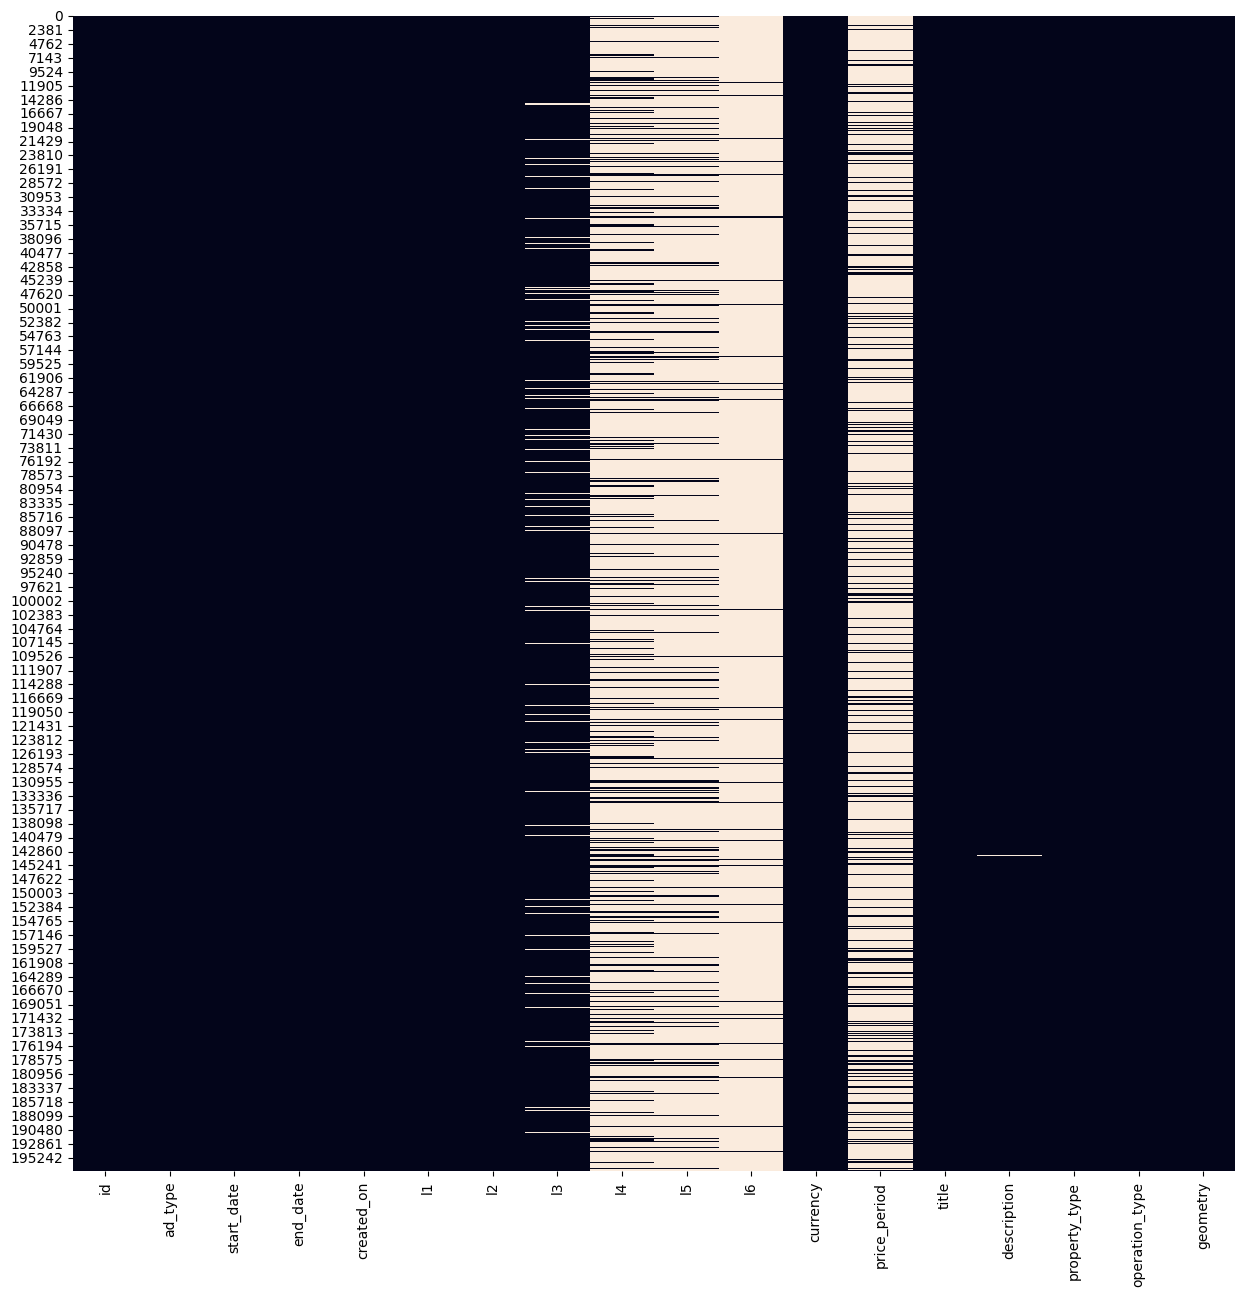

In [12]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_var_cat.isnull(), cbar=False)
plt.show()

In [13]:
df_var_cat = df_var_cat.drop(['l4','l5','l6','price_period'], axis=1)

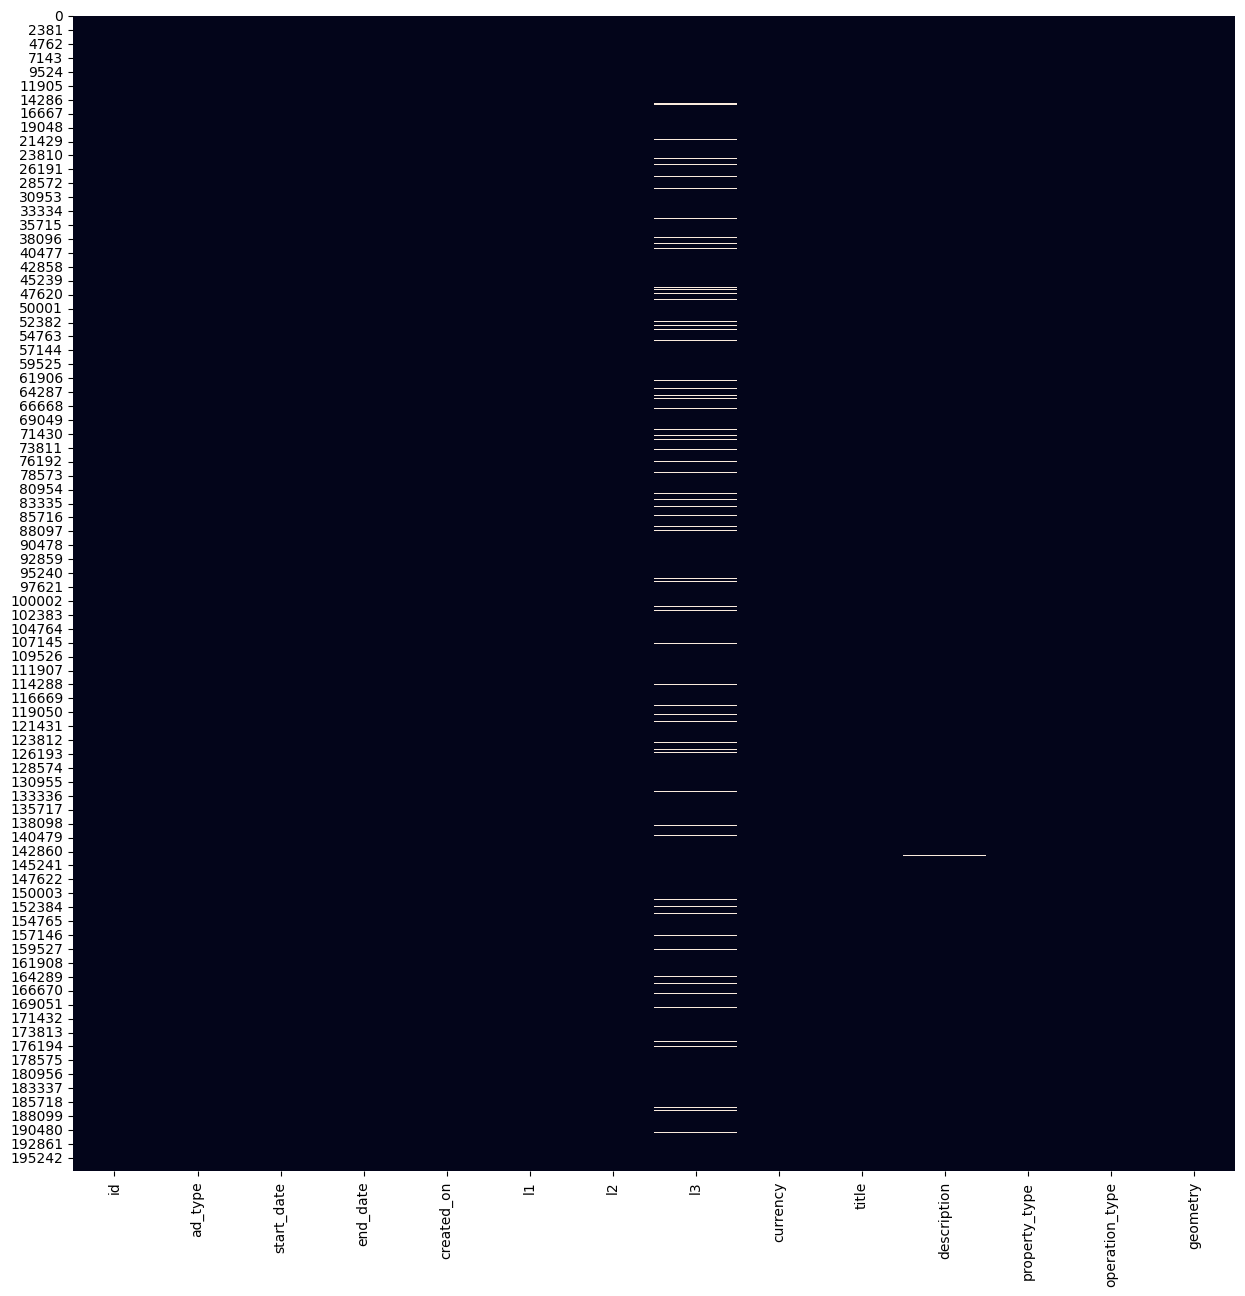

In [14]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_var_cat.isnull(), cbar=False)
plt.show()

In [15]:
df_var_cat=df_var_cat.fillna('None')

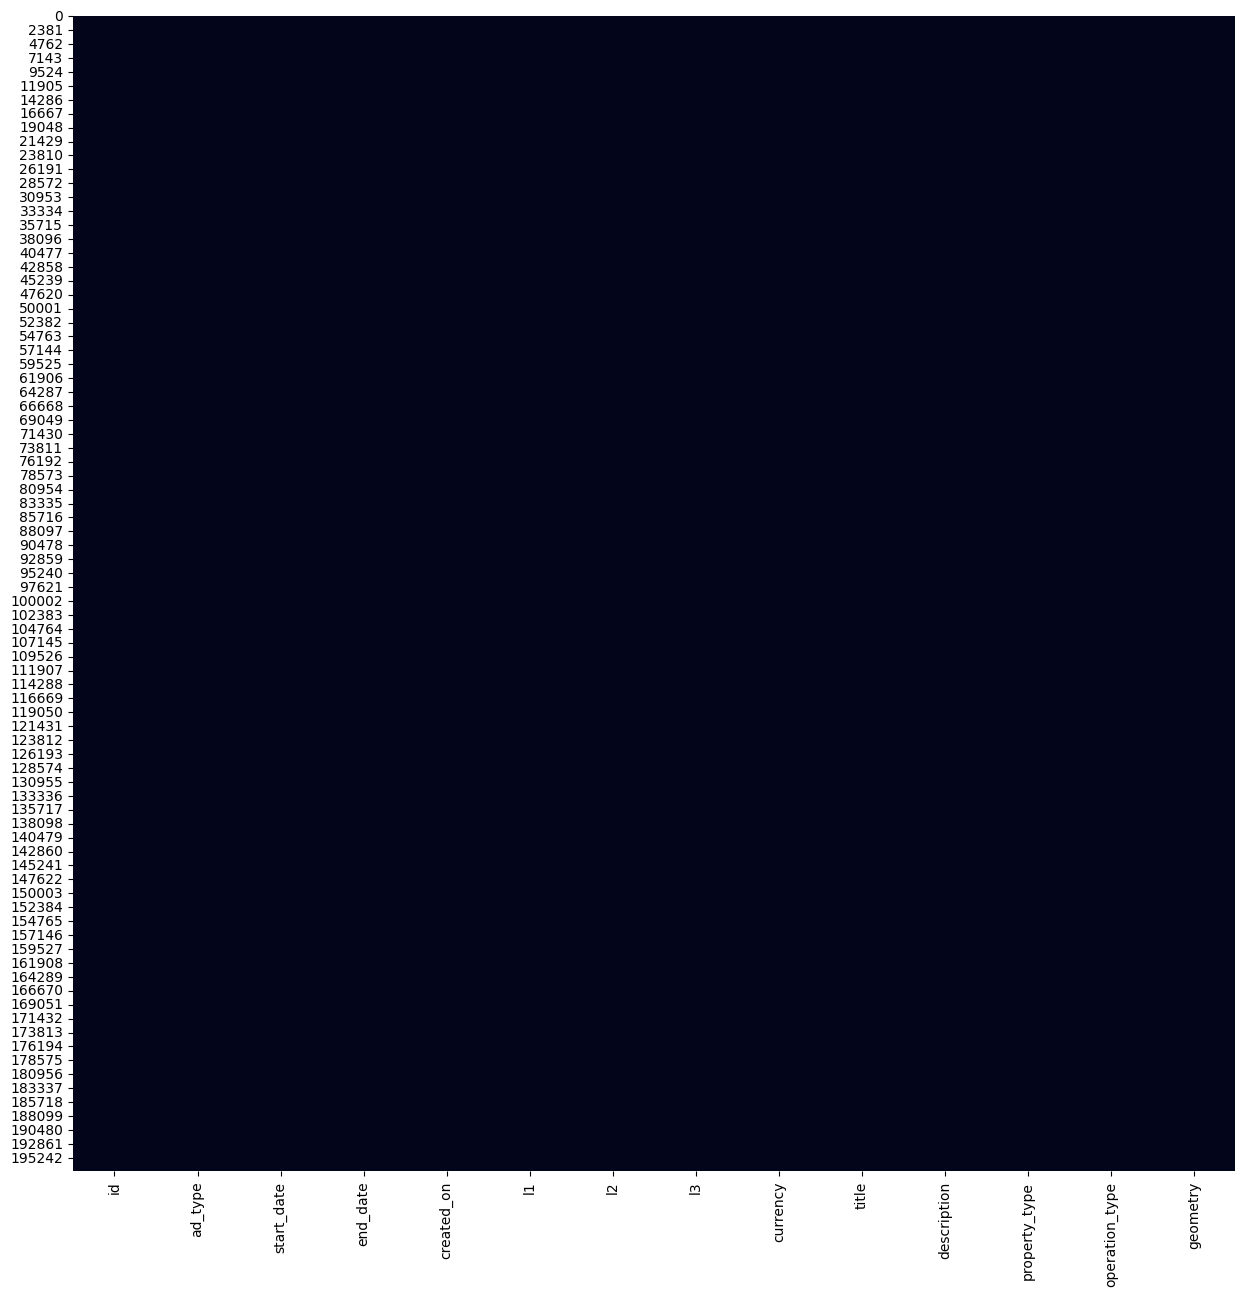

In [16]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_var_cat.isnull(), cbar=False)
plt.show()

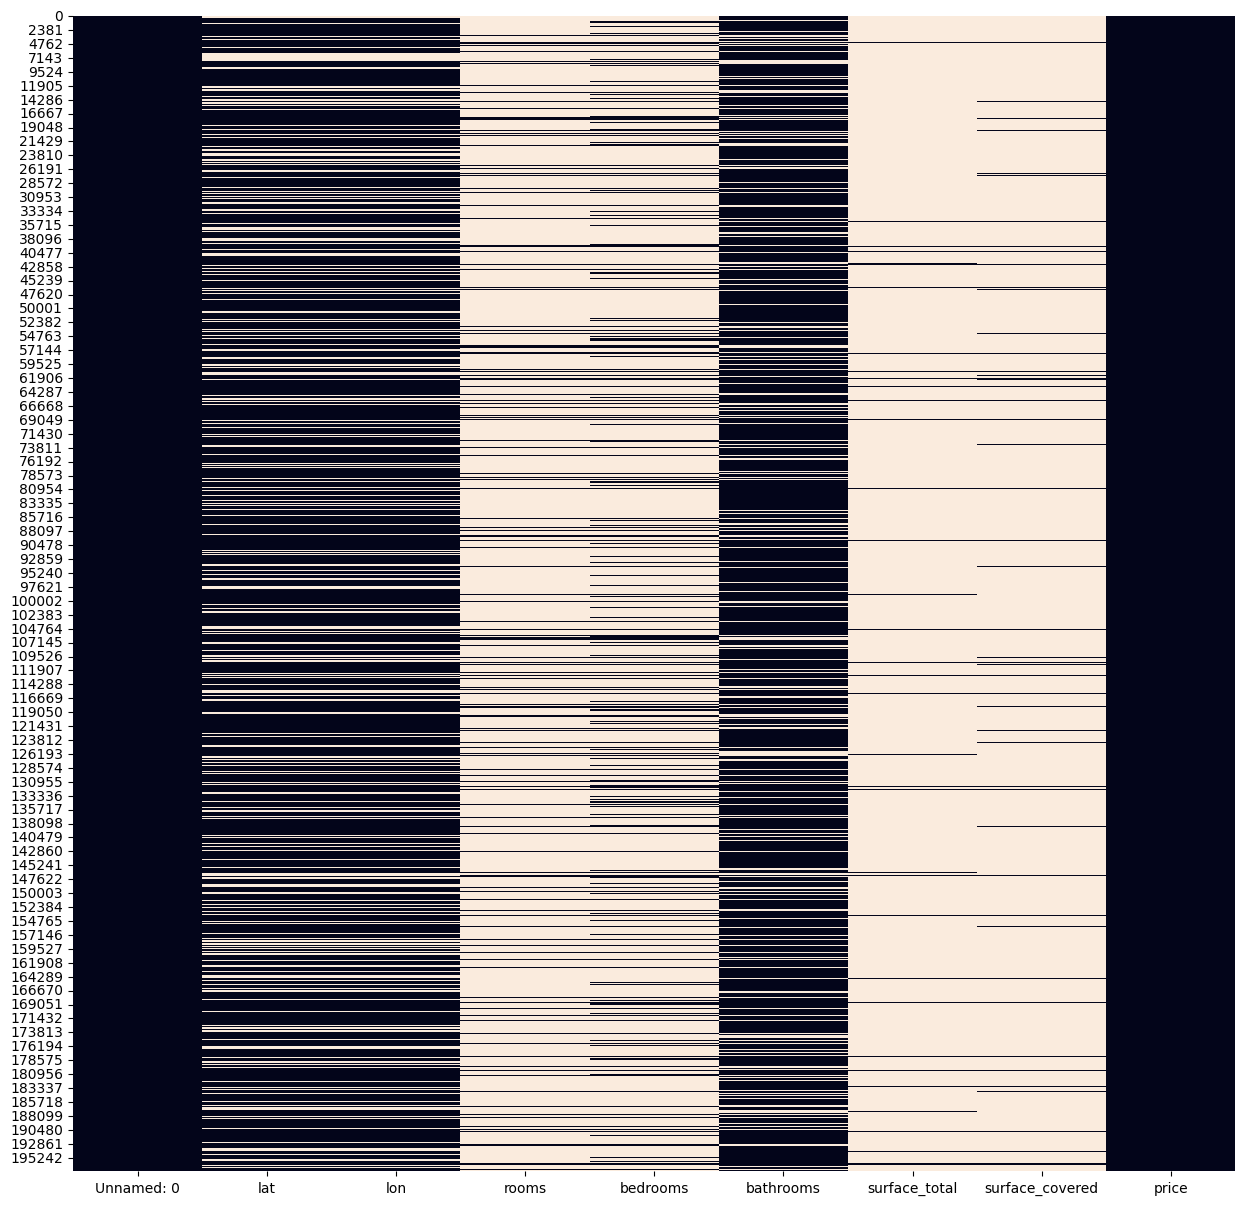

In [17]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_var_num.isnull(), cbar=False)
plt.show()

In [18]:
df_var_num.fillna(df_var_num.mean(), inplace=True)
df_var_num.isnull().sum()

Unnamed: 0         0
lat                0
lon                0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

In [19]:
df_var_num

,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,861131,6.203000,-75.572000,3.291208,4.000000,4.000000,1352.132349,948.335646,9.000000e+09
1,200972,4.722748,-74.073115,3.291208,3.000000,2.000000,1352.132349,948.335646,6.250000e+08
2,554622,4.709000,-74.030000,3.291208,3.239062,2.000000,1352.132349,948.335646,4.200000e+08
3,540321,5.666001,-75.041045,3.291208,3.239062,1.000000,1352.132349,948.335646,1.310000e+09
4,448920,5.666001,-75.041045,3.291208,3.239062,2.000000,1352.132349,948.335646,2.100000e+08
...,...,...,...,...,...,...,...,...,...
197544,444298,4.649682,-74.161950,3.000000,3.000000,2.639279,1352.132349,948.335646,1.290000e+08
197545,976934,4.668000,-74.055000,3.291208,3.239062,1.000000,1352.132349,17.000000,1.350000e+08
197546,508286,3.413000,-76.541000,3.291208,3.239062,1.000000,1352.132349,948.335646,5.200000e+08
197547,546633,4.674874,-74.147077,3.291208,3.239062,2.000000,1352.132349,948.335646,2.900000e+08


In [20]:
df_var_num=df_var_num.round({"rooms":0, "bedrooms":0, "bathrooms":0}) 

In [21]:
df_var_num

,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,861131,6.203000,-75.572000,3.0,4.0,4.0,1352.132349,948.335646,9.000000e+09
1,200972,4.722748,-74.073115,3.0,3.0,2.0,1352.132349,948.335646,6.250000e+08
2,554622,4.709000,-74.030000,3.0,3.0,2.0,1352.132349,948.335646,4.200000e+08
3,540321,5.666001,-75.041045,3.0,3.0,1.0,1352.132349,948.335646,1.310000e+09
4,448920,5.666001,-75.041045,3.0,3.0,2.0,1352.132349,948.335646,2.100000e+08
...,...,...,...,...,...,...,...,...,...
197544,444298,4.649682,-74.161950,3.0,3.0,3.0,1352.132349,948.335646,1.290000e+08
197545,976934,4.668000,-74.055000,3.0,3.0,1.0,1352.132349,17.000000,1.350000e+08
197546,508286,3.413000,-76.541000,3.0,3.0,1.0,1352.132349,948.335646,5.200000e+08
197547,546633,4.674874,-74.147077,3.0,3.0,2.0,1352.132349,948.335646,2.900000e+08


In [22]:
for col in df_var_cat.columns:
    if(df_var_cat[col].dtype=='object'):
        le=LabelEncoder()
        df_var_cat[col]=le.fit_transform(df_var_cat[col])

In [23]:
df_var_cat.head(2)

,id,ad_type,start_date,end_date,created_on,l1,l2,l3,currency,title,description,property_type,operation_type,geometry
0,44870,0,127,445,127,0,1,148,0,50504,10658,1,0,40174
1,48763,0,48,289,48,0,12,27,0,7484,99578,0,0,14906


In [24]:
df=pd.concat([df_var_cat, df_var_num], axis=1)

In [25]:
df

,id,ad_type,start_date,end_date,created_on,l1,l2,l3,currency,title,...,geometry,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,44870,0,127,445,127,0,1,148,0,50504,...,40174,861131,6.203000,-75.572000,3.0,4.0,4.0,1352.132349,948.335646,9.000000e+09
1,48763,0,48,289,48,0,12,27,0,7484,...,14906,200972,4.722748,-74.073115,3.0,3.0,2.0,1352.132349,948.335646,6.250000e+08
2,193666,0,23,25,23,0,12,27,0,13576,...,6827,554622,4.709000,-74.030000,3.0,3.0,2.0,1352.132349,948.335646,4.200000e+08
3,139596,0,106,125,106,0,26,29,0,62613,...,62806,540321,5.666001,-75.041045,3.0,3.0,1.0,1352.132349,948.335646,1.310000e+09
4,117871,0,63,71,63,0,1,148,0,23175,...,62806,448920,5.666001,-75.041045,3.0,3.0,2.0,1352.132349,948.335646,2.100000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,179200,0,82,445,82,0,12,27,0,51607,...,20605,444298,4.649682,-74.161950,3.0,3.0,3.0,1352.132349,948.335646,1.290000e+08
197545,154269,0,110,134,110,0,12,27,0,57882,...,11886,976934,4.668000,-74.055000,3.0,3.0,1.0,1352.132349,17.000000,1.350000e+08
197546,158662,0,83,158,83,0,29,38,0,53842,...,59328,508286,3.413000,-76.541000,3.0,3.0,1.0,1352.132349,948.335646,5.200000e+08
197547,125218,0,18,19,18,0,12,27,0,74996,...,19978,546633,4.674874,-74.147077,3.0,3.0,2.0,1352.132349,948.335646,2.900000e+08


In [26]:
df["target"] = (df['price'] >= promedio).astype(int)

In [27]:
df.head(2)

,id,ad_type,start_date,end_date,created_on,l1,l2,l3,currency,title,...,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,target
0,44870,0,127,445,127,0,1,148,0,50504,...,861131,6.203000,-75.572000,3.0,4.0,4.0,1352.132349,948.335646,9.000000e+09,1
1,48763,0,48,289,48,0,12,27,0,7484,...,200972,4.722748,-74.073115,3.0,3.0,2.0,1352.132349,948.335646,6.250000e+08,0


In [28]:
df=df.drop(columns=['start_date','end_date','title'])

In [29]:
cor=df[:].corr()
cor=cor.sort_values(['target'],ascending=False)

In [30]:
cor.target.head(28)

target             1.000000
bathrooms          0.470351
price              0.330460
property_type      0.272554
rooms              0.104495
bedrooms           0.093460
lon                0.035035
surface_total      0.032819
description        0.029470
created_on         0.024122
currency           0.023202
Unnamed: 0         0.007917
surface_covered    0.006360
id                -0.000609
l2                -0.011013
lat               -0.018955
l3                -0.061358
geometry          -0.075462
ad_type                 NaN
l1                      NaN
operation_type          NaN
Name: target, dtype: float64

In [31]:
df=df.drop(columns=['l1','operation_type','ad_type', 'geometry','l3','l2','id','surface_covered','Unnamed: 0'])

In [32]:
df=df.drop(columns=['price'])

In [33]:
x=df.drop(columns=['target'])
y=df.target


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
escalar = StandardScaler()
x_train = escalar.fit_transform(x_train)
x_test= escalar.transform(x_test)

In [37]:
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

In [38]:
algoritmo.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred=algoritmo.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix


In [41]:
matriz=confusion_matrix(y_test, y_pred)
print('matriz de confusion')
print(matriz)

matriz de confusion
[[28747  1600]
 [ 5933  3230]]


In [42]:
from sklearn.metrics import precision_score

In [43]:
precision= precision_score(y_test, y_pred)
print('precision')
print(precision)

precision
0.6687370600414079


In [44]:
from sklearn.metrics import accuracy_score

In [45]:
score= accuracy_score(y_test, y_pred)
print('score')
print(score)

score
0.8093394077448747


In [46]:
from sklearn.metrics import recall_score
recall= accuracy_score(y_test, y_pred)
print('recall')
print(recall)

recall
0.8093394077448747


In [47]:
df_test=pd.read_csv('properties_colombia_test.csv')

In [48]:
df_var_cat_test= df_test.select_dtypes(include=['object'])
df_var_num_test= df_test.select_dtypes(include=['int64','float64'])

In [49]:
df_var_cat_test = df_var_cat_test.drop(['l4','l5','l6','price_period'], axis=1)

In [50]:
df_var_cat_test=df_var_cat_test.fillna('None')

In [51]:
df_var_num_test.fillna(df_var_num_test.mean(), inplace=True)
df_var_num_test.isnull().sum()

Unnamed: 0         0
lat                0
lon                0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
dtype: int64

In [52]:
df_var_num_test=df_var_num_test.round({"rooms":0, "bedrooms":0, "bathrooms":0}) 

In [53]:
for col in df_var_cat_test.columns:
    if(df_var_cat_test[col].dtype=='object'):
        le=LabelEncoder()
        df_var_cat_test[col]=le.fit_transform(df_var_cat_test[col])

In [54]:
df_test=pd.concat([df_var_cat_test, df_var_num_test], axis=1)

In [58]:
df_test.head(2)

,id,ad_type,start_date,end_date,created_on,l1,l2,l3,currency,title,...,operation_type,geometry,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,54990,0,37,46,37,0,12,24,0,16368,...,0,7169,852569,4.722000,-74.075000,3.0,3.0,3.0,660.000000,350.00000
1,23675,0,75,84,75,0,1,67,0,27204,...,0,30212,121379,5.686868,-75.042164,3.0,3.0,3.0,1355.283924,5616.33767


In [60]:
df_test = df_test.drop(['id','ad_type','start_date','end_date','l1','l2','l3','title','geometry','Unnamed: 0'], axis=1)

In [62]:
df_test = df_test.drop(['surface_covered','operation_type'], axis=1)

In [63]:
df_test

,created_on,currency,description,property_type,lat,lon,rooms,bedrooms,bathrooms,surface_total
0,37,0,22018,1,4.722000,-74.075000,3.0,3.0,3.0,660.000000
1,75,0,32603,0,5.686868,-75.042164,3.0,3.0,3.0,1355.283924
2,75,0,15927,1,6.259253,-75.628381,3.0,3.0,1.0,1355.283924
3,123,0,14847,4,6.203000,-75.556000,3.0,3.0,3.0,2793.000000
4,123,0,19144,1,5.686868,-75.042164,3.0,3.0,2.0,1355.283924
...,...,...,...,...,...,...,...,...,...,...
65845,115,0,47260,0,6.212981,-75.599349,3.0,3.0,3.0,1355.283924
65846,1,0,37579,0,5.041331,-75.512415,3.0,3.0,1.0,1355.283924
65847,91,0,15826,6,5.064733,-75.670570,3.0,3.0,2.0,1355.283924
65848,127,0,40981,0,7.138641,-73.127312,3.0,3.0,2.0,1355.283924


In [57]:
df.head(2)

,created_on,currency,description,property_type,lat,lon,rooms,bedrooms,bathrooms,surface_total,target
0,127,0,10658,1,6.203000,-75.572000,3.0,4.0,4.0,1352.132349,1
1,48,0,99578,0,4.722748,-74.073115,3.0,3.0,2.0,1352.132349,0


In [64]:
df_resultado = algoritmo.predict(df_test)

C:\Users\diane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [65]:
pred_test=pd.DataFrame(df_resultado, columns=['pred'])

In [66]:
pred_test.to_csv('./dianece03.csv',index=False)